In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Read CSV file into a pandas DataFrame 
# Does *not* use first line as a header, recognizes white space character as a field separator 
# see https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html 
data = pd.read_csv("data/zip.train", header=None, sep=" ")

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0,NaN
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,NaN
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0,NaN
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,NaN
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0,NaN


As described in ```zip.info.txt``` row 0 holds the value of the integer represented by the following 256 values of gray scale. Row 257 is NaN because all lines end with a non-printing character. 

In [4]:
# Lose the last column 
del data[257]

In [5]:
"""
The int() method can not be applied to a pandas Series, so in ordert to 
convert the values in row 0 to integers I define a lambda function.
"""

int_x = lambda x: int(x)

In [6]:
# I then apply the function on row 0 of the pandas Series 
data.iloc[:,0] = data.iloc[:,0].apply(int_x)

In [7]:
# Check the first lines of data for the conversion
data.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


In [8]:
"""
To calculate descriptive values for every character all values for a character 
need to be extracted from the dataset respectively. 
For style guidelines see 
https://www.python.org/dev/peps/pep-0008/#function-and-variable-names
"""
def get_data_for_character (data, character):
    # gets all columns in the first row with a matching character 
    data_character = pd.DataFrame(data[data[0] == character]) 
    # ignore the value in the first column and return only grey values 
    grey_values = data_character.iloc[:,1:]
    return grey_values

In [9]:
# count the number of unique values in the column 0 
samples_per_digit = pd.DataFrame(data.iloc[:,0].value_counts())

In [10]:
# sorts the DataFrame by the index 
samples_per_digit.sort_index(inplace=True)

In [11]:
# This should rename the column 0 but does not. Why, oh why? 
samples_per_digit = samples_per_digit.rename(columns = {'0':'n'})

In [12]:
# This should rename the column 0 but does not. Why, oh why? 
samples_per_digit.rename(columns={'0':'new_name'}, inplace=True)

In [13]:
samples_per_digit

,0
0,1194
1,1005
2,731
3,658
4,652
5,556
6,664
7,645
8,542
9,644


In [14]:
data_8 = get_data_for_character (data, 8)

In [21]:
# get grey values for the nth pixel 
data_8_112 = data_8.loc[:,112]
data_8_113 = data_8.loc[:,113]
data_8_114 = data_8.loc[:,114]
data_8_115 = data_8.loc[:,115]
data_8_116 = data_8.loc[:,116]
data_8_117 = data_8.loc[:,117]
data_8_118 = data_8.loc[:,118]
data_8_119 = data_8.loc[:,119]

In [28]:
type(data_8_117)

pandas.core.series.Series

In [29]:
data_8_117.describe()

count    542.000000
mean      -0.458387
std        0.763325
min       -1.000000
25%       -1.000000
50%       -0.987000
75%        0.062750
max        1.000000
Name: 117, dtype: float64

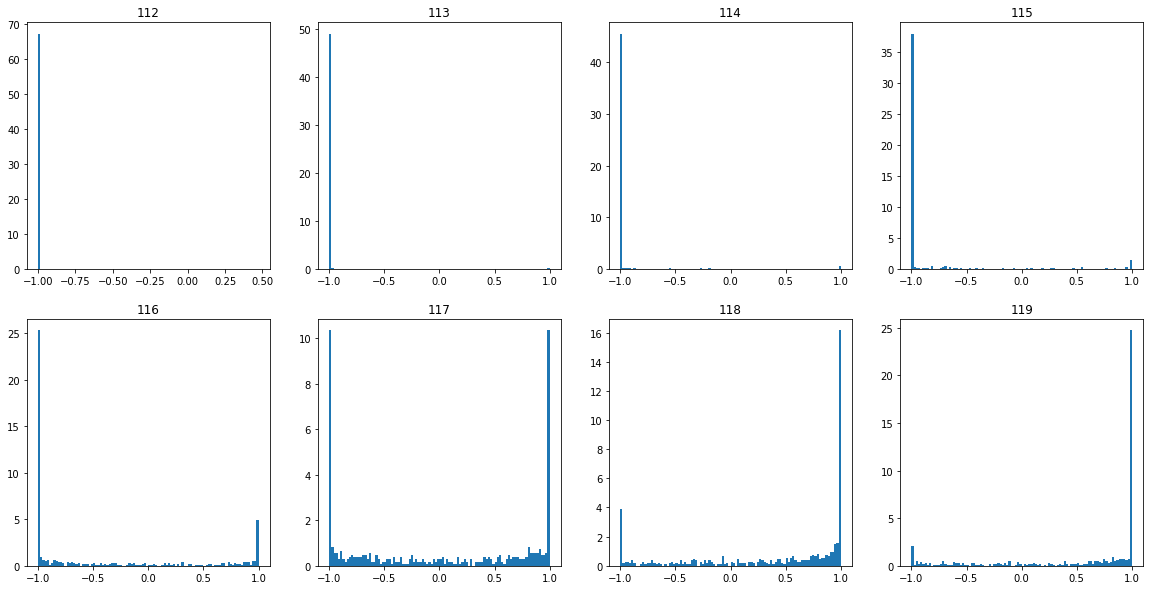

In [16]:
# set up a figure as a container 
fig = plt.figure(figsize=(20, 10))

#  First row of subplots 
fig.add_subplot(2,4,1)
plt.hist(data_8_112, 100, density=True)
plt.title('112')

fig.add_subplot(2,4,2)
plt.hist(data_8_113, 100, density=True)
plt.title('113')

fig.add_subplot(2,4,3)
plt.hist(data_8_114, 100, density=True)
plt.title('114')

fig.add_subplot(2,4,4)
plt.hist(data_8_115, 100, density=True)
plt.title('115')

# Second row of subplots 
fig.add_subplot(2,4,5)
plt.hist(data_8_116, 100, density=True)
plt.title('116')

fig.add_subplot(2,4,6)
plt.hist(data_8_117, 100, density=True)
plt.title('117')

fig.add_subplot(2,4,7)
plt.hist(data_8_118, 100, density=True)
plt.title('118')

fig.add_subplot(2,4,8)
plt.hist(data_8_119, 100, density=True)
plt.title('119')

plt.show()

In [27]:
# Computing clusters 
kmeans = KMeans(n_clusters=2, random_state=0).fit(data_8_117)
data_8_117['cluster_id'] = kmeans.predict(data_8_117)

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.31   0.301  1.    -1.     1.    -1.    -0.715  1.    -1.    -1.
  0.423 -0.156  0.903  0.854 -0.348 -1.    -0.15  -1.    -0.975 -0.43
 -1.    -1.    -1.    -0.932 -1.    -0.964 -0.627 -1.     1.    -1.
  0.571  1.     0.969 -1.     0.155 -1.    -1.    -1.    -1.     0.988
 -0.648 -0.7   -0.673 -1.    -1.    -0.628 -1.    -0.319 -1.     0.064
  1.    -1.    -1.    -0.33  -0.57  -1.    -1.    -1.     0.379 -0.916
  0.739  0.884 -1.    -0.958 -0.247  0.726 -0.034 -1.     0.984  0.796
 -1.    -1.    -1.     1.    -0.833 -0.931 -1.    -1.    -0.03  -1.
  0.817 -1.    -1.    -1.    -1.     1.     0.747  0.004 -1.    -1.
  0.764 -1.    -1.    -1.    -0.81   1.     1.    -0.993 -0.829 -1.
 -1.    -0.064 -0.309 -1.    -1.    -1.    -0.737  0.889 -1.    -1.
 -1.     0.163 -1.    -1.    -1.    -1.     0.958 -0.768 -1.    -1.
 -1.     0.972  1.    -1.    -0.99  -1.    -1.     1.    -0.268 -0.554
 -1.    -1.    -1.    -1.     0.302 -1.    -1.    -0.879 -0.926 -0.909
 -1.    -0.423 -1.    -0.996 -1.    -1.    -0.984  0.689 -0.995 -0.918
  1.    -0.826  0.9   -1.    -1.    -0.993 -1.     0.791 -1.    -0.315
 -1.    -1.     1.    -1.     0.906 -1.     1.    -1.    -0.984 -1.
 -1.    -1.    -0.505 -0.725  0.947  0.833 -1.    -1.    -1.    -0.82
 -0.033 -1.    -0.704  1.     0.978 -1.    -0.662 -1.    -0.132  1.
 -1.    -1.    -1.    -1.     0.229 -1.    -1.     1.    -1.     0.181
  1.    -1.    -1.     0.386 -1.    -1.    -1.    -1.     0.059 -0.921
  0.686 -1.    -0.6   -1.    -1.    -1.    -1.    -1.    -0.952 -1.
 -1.    -1.    -1.    -1.    -1.     0.874  0.208 -1.     0.866 -0.722
  0.803  0.222 -1.    -1.    -0.191 -0.699 -0.922  0.963 -1.    -1.
 -1.    -0.848 -0.856  0.577 -1.     1.    -1.    -1.    -1.    -0.958
  0.959  0.694 -0.414 -1.    -0.799 -0.395  1.     1.    -1.    -0.967
  0.724 -1.    -1.    -0.947 -1.    -1.    -1.    -1.     0.535 -0.519
 -1.    -1.    -0.045 -1.    -1.    -1.    -1.     0.956 -0.837  0.905
 -1.    -0.958 -0.81  -0.901 -1.    -1.    -0.73  -1.    -1.    -0.777
 -1.    -1.    -1.    -0.347 -1.    -0.57  -1.     0.148  1.     0.63
 -0.997 -1.     0.891 -1.    -1.    -0.712 -0.973 -0.99  -1.     1.
 -0.583  0.995 -1.    -1.    -0.664 -1.    -1.     0.877 -0.625  0.453
 -1.    -1.    -1.    -1.     1.     0.79  -0.966 -1.    -1.    -0.926
 -0.782 -1.    -1.    -1.    -1.    -1.    -0.796 -1.    -1.    -0.392
 -0.996  0.738 -0.177  0.652  1.    -1.    -1.    -1.    -0.846  1.
 -0.162 -1.    -0.952 -1.     0.918 -0.984  0.908 -0.79  -0.8   -1.
 -1.    -1.    -1.    -1.    -0.855 -1.     1.    -0.776 -0.914 -1.
 -0.421  0.671 -0.971  0.317 -0.802 -1.    -0.842  0.193  0.995  0.862
 -0.99   0.181 -1.    -0.837 -1.     0.385  0.037  1.    -1.    -1.
 -0.489 -1.    -0.473 -1.     0.973 -1.     1.     0.753  1.    -0.288
 -0.856  0.926 -0.894 -1.    -1.     0.135  1.    -1.     0.462 -1.
 -0.124 -1.    -0.863 -1.    -0.969  0.543 -1.    -0.826 -1.    -1.
  1.     1.    -0.999 -0.139  1.     0.156  1.     0.615 -1.     0.268
 -0.955 -0.551 -1.    -0.299 -0.092 -0.043 -1.    -1.    -1.    -1.
 -0.299 -1.     1.    -0.373 -1.    -1.    -0.324 -1.    -1.     0.866
 -1.    -0.697 -1.    -1.    -1.    -0.976 -1.    -1.    -1.    -1.
 -1.    -0.999 -1.     1.     1.    -1.     0.663 -1.    -0.486 -0.657
 -0.481  0.663 -1.     0.277  0.047  0.829 -1.    -1.    -1.     1.
 -1.    -0.916 -0.7   -1.    -1.    -1.     1.    -1.    -1.     1.
 -0.857 -1.    -1.    -1.     0.72   0.549 -1.    -1.    -0.969 -1.
 -0.974 -1.    -1.     0.497 -1.    -1.     1.    -0.876 -1.    -1.
 -0.168  1.     0.998 -0.119 -1.    -1.    -1.    -1.    -1.     1.
 -1.    -0.324  0.94   1.    -1.    -0.914 -1.    -1.     0.368 -1.
 -1.     1.    -1.     1.    -1.    -1.     0.97   0.952 -0.45  -1.
 -1.    -1.   ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.